In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

import math
import numpy as np

# Quad Params

In [2]:
# calculate gamma*beta
c = 299792458
mec2 = 0.51099895000e6 # eV
Etot = 6e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)

p = GB*mec2/1e6  # [MeV/c]

grad = 0.00714  # [T/m]
length =  0.21  # [m]
gap = 0.0254    # [1"] 

# Quad Profile w/Fringe 

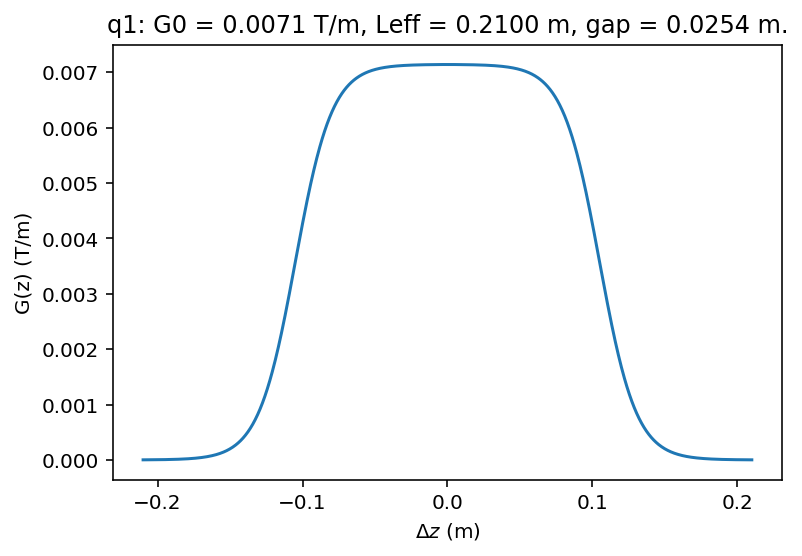

In [3]:
from gpt.element import Lattice
from gpt.bstatic import QuadF

lat = Lattice('quad test')
lat.add(QuadF('q1', grad, length, gap=0.0254), ds=0.25)
lat['q1'].plot(title=True);

# Kick predictions
The kick in the x and y directions for an offset particle can be approximated as $\Delta \theta_x \approx (eG/p)L_{\text{eff}}\cdot\Delta x$ and $\Delta \theta_y \approx -(eG/p)L_{\text{eff}}\cdot\Delta y$

In [4]:
x_off = 1e-3 # 1 mm
y_off = 1e-3 # 1 mm

print('Predicted H-kick:', +lat['q1']._G*c/(p*1e6)*lat['q1'].Leff*x_off)
print('Predicted V-kick:', -lat['q1']._G*c/(p*1e6)*lat['q1'].Leff*y_off)

Predicted H-kick: 7.51913250176069e-05
Predicted V-kick: -7.51913250176069e-05


In [5]:
from gpt import GPT

lat.write_gpt_lines(output_file='gpt.temp.in')

G = GPT(input_file='gpt.temp.in')
G.set_variables({'space_charge':0, 'xacc':12, 'GBacc':12})

particles_x = G.track1(x0=x_off, pz0=p*1e6)
Gx = G.copy()
Gx.run()

particles_y = G.track1(y0=y_off, pz0=p*1e6)
Gy = G.copy()
Gy.run()

print('Computed H-kick:', particles_x['mean_px']/particles_x['mean_pz'])
print('Computed V-kick:', particles_y['mean_py']/particles_y['mean_pz'])

Computed H-kick: 7.540311483458465e-05
Computed V-kick: -7.498133025802208e-05


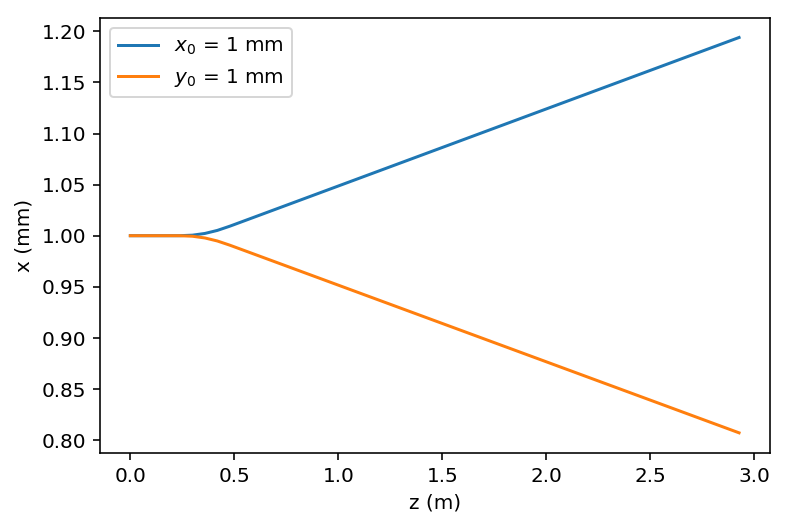

In [6]:
plt.plot(Gx.stat('mean_z'), Gx.stat('mean_x')*1000, Gy.stat('mean_z'), Gy.stat('mean_y')*1000);
plt.xlabel('z (m)');
plt.ylabel('x (mm)');
plt.legend(['$x_0$ = 1 mm', '$y_0$ = 1 mm']);

In [7]:
os.system('rm -rf gpt.temp.in');